# 🐼 Advanced Pandas Data Visualization

This notebook provides a lesson on advanced data visualization using Pandas, Matplotlib, and Seaborn. You'll explore:

- Customizing Pandas plots
- Using Seaborn with Pandas
- Time series visualization
- Multivariate relationships

> ⚠️ Prerequisite: Familiarity with basic Pandas and Python plotting

## Quick Refresher and Pandas Plotting Basics

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Create a sample DataFrame with sales and expenses data for each month
df = pd.DataFrame({
    'Sales': np.random.randint(100, 500, 12),
    'Expenses': np.random.randint(80, 450, 12),
    'Month': pd.date_range('2023-01-01', periods=12, freq='M')
})

# Set 'Month' as the index for easier time series plotting
df.set_index('Month', inplace=True)

# Display the first few rows of the DataFrame
df.head()

C:\Users\David.Togami\AppData\Local\Temp\ipykernel_17292\2214196285.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Month': pd.date_range('2023-01-01', periods=12, freq='M')


,Sales,Expenses
Month,,
2023-01-31,145,372
2023-02-28,311,108
2023-03-31,377,96
2023-04-30,204,418
2023-05-31,338,442


<Axes: title={'center': 'Monthly Sales vs Expenses'}, xlabel='Month'>

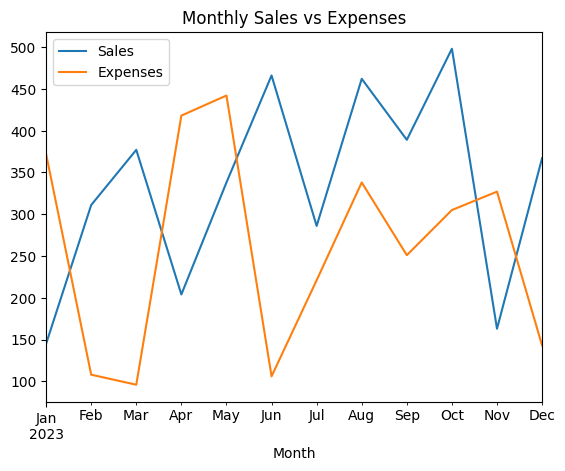

In [2]:
# Plot Sales vs Expenses using default line plot
df.plot(title="Monthly Sales vs Expenses")

## Advanced Plot Types & Customization

<Axes: title={'center': 'Trend Analysis'}, xlabel='Month'>

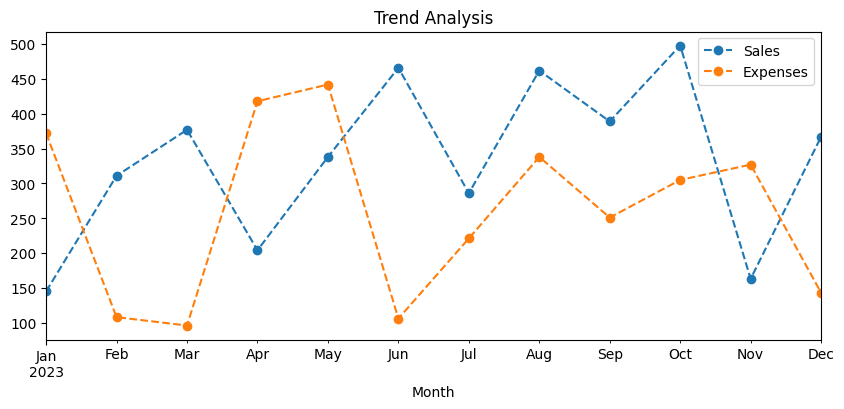

In [3]:
# Create a customized line plot with markers and dashed lines
df.plot(y=['Sales', 'Expenses'], kind='line', linestyle='--', marker='o', figsize=(10, 4), title="Trend Analysis")

<Axes: title={'center': 'Monthly Sales and Expenses'}, xlabel='Month'>

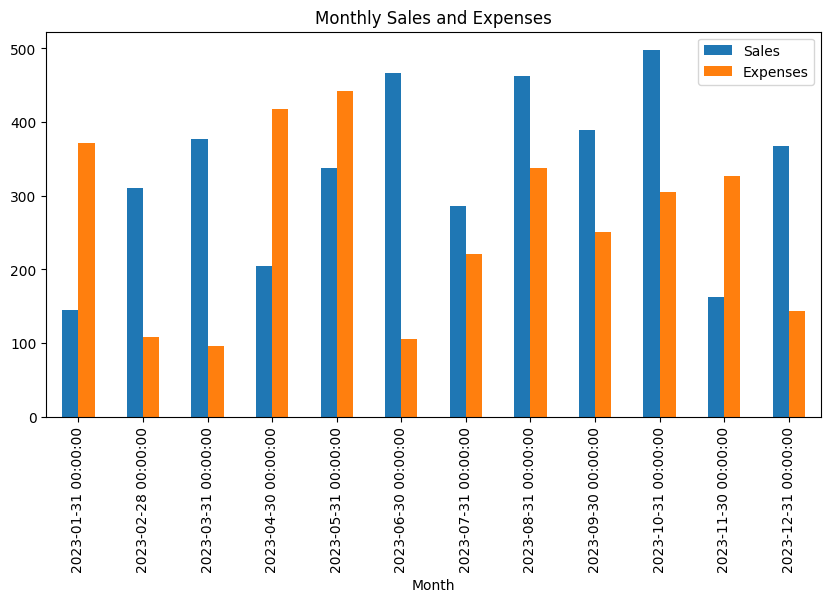

In [4]:
# Create a grouped bar chart to compare sales and expenses each month
df[['Sales', 'Expenses']].plot(kind='bar', figsize=(10, 5), title="Monthly Sales and Expenses")

<Axes: title={'center': 'Stacked Bar Chart'}, xlabel='Month'>

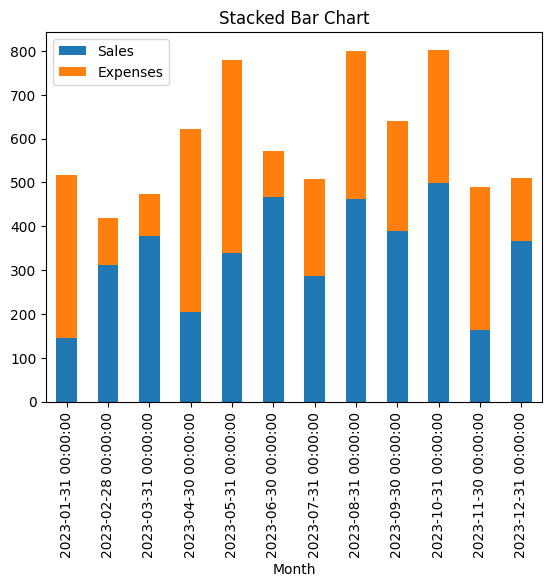

In [5]:
# Create a stacked bar chart to show cumulative values per month
df[['Sales', 'Expenses']].plot(kind='bar', stacked=True, title="Stacked Bar Chart")

<Axes: title={'center': 'Area Chart'}, xlabel='Month'>

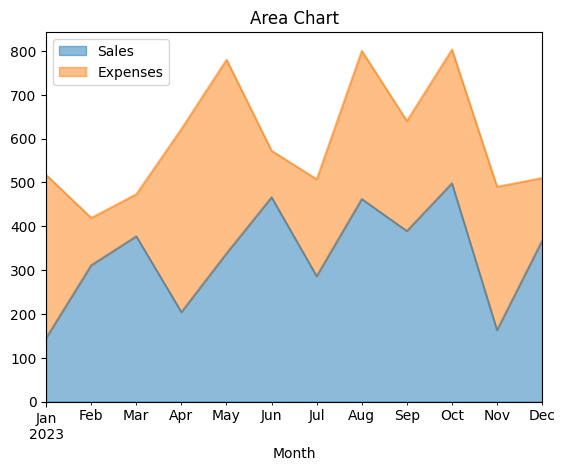

In [6]:
# Area chart to show volume over time
df[['Sales', 'Expenses']].plot(kind='area', alpha=0.5, title="Area Chart")

<Axes: title={'center': 'Last Month Distribution'}, ylabel='2023-12-31 00:00:00'>

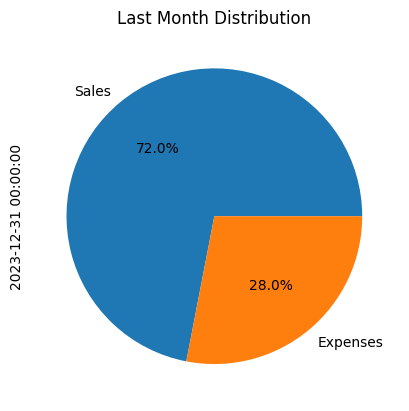

In [7]:
# Pie chart of sales vs expenses for the last month
# This is a snapshot pie chart for the latest row in the DataFrame
df.iloc[-1].plot(kind='pie', autopct='%1.1f%%', title="Last Month Distribution")

## Custom Styling + Seaborn Integration

<Axes: title={'center': 'Styled Plot'}, xlabel='Month'>

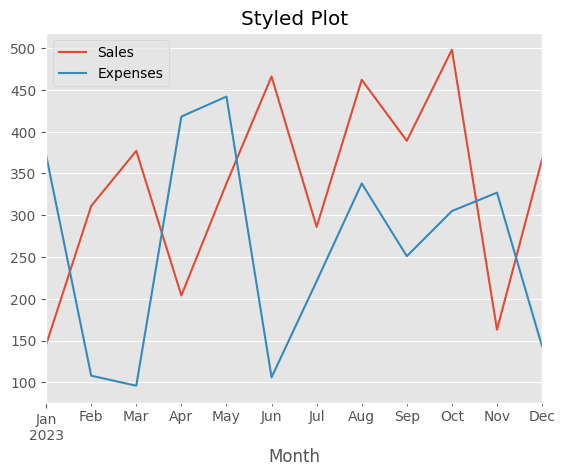

In [8]:
# Use ggplot style for a cleaner look
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Re-plot with the new style
df.plot(title="Styled Plot")

Text(2023-10-31 00:00:00, 518, 'Peak')

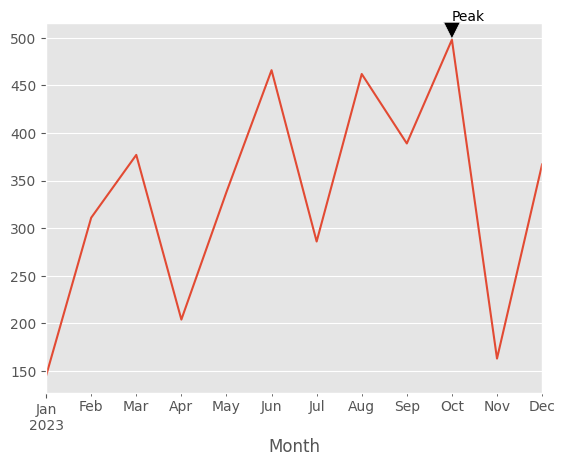

In [9]:
# Annotate the peak Sales point on the line chart
ax = df['Sales'].plot()
peak = df['Sales'].idxmax()  # Find the month with the highest Sales

# Annotate the chart with an arrow and label
ax.annotate('Peak', xy=(peak, df['Sales'].max()), xytext=(peak, df['Sales'].max()+20),
            arrowprops=dict(facecolor='black', shrink=0.05))

<Axes: >

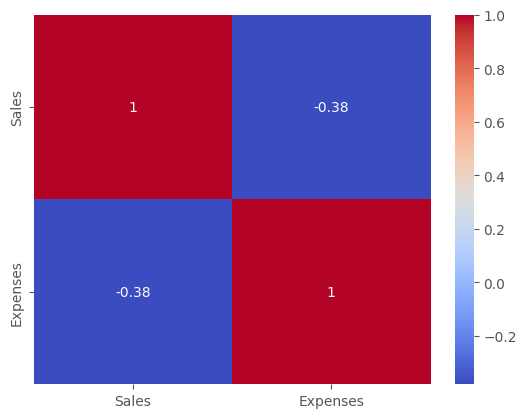

In [10]:
# Create a heatmap of correlations using Seaborn
import seaborn as sns
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

<Axes: xlabel='Sales', ylabel='Count'>

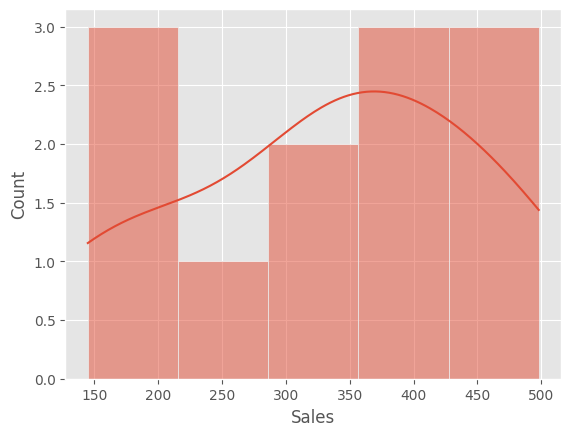

In [11]:
# Show distribution of Sales using a histogram with KDE overlay
sns.histplot(df['Sales'], kde=True)

<Axes: >

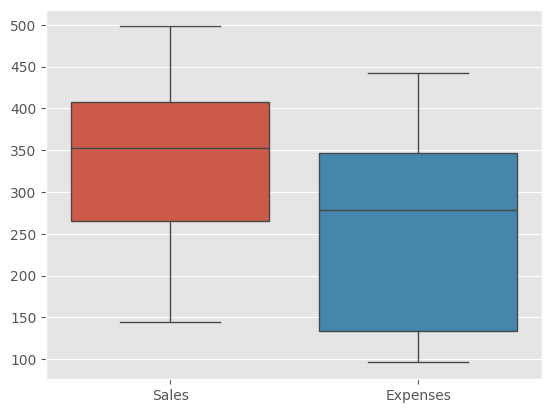

In [12]:
# Show boxplot to compare distributions of Sales and Expenses
sns.boxplot(data=df[['Sales', 'Expenses']])

## Time Series & Multi-Variable Visualization

<Axes: title={'center': '3-Month Rolling Average'}, xlabel='Month'>

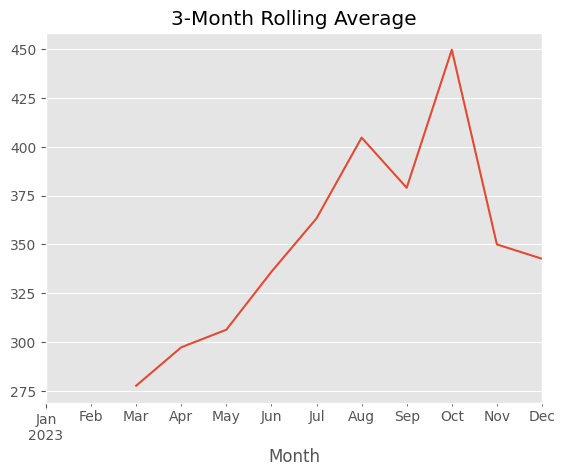

In [13]:
# Rolling mean to smooth out short-term fluctuations
# This shows a 3-month moving average of Sales
df['Sales'].rolling(window=3).mean().plot(title="3-Month Rolling Average")

<Axes: >

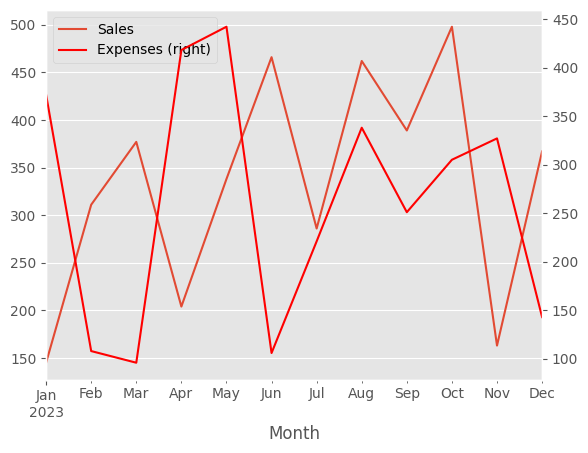

In [14]:
# Dual-axis plot: Sales on primary axis, Expenses on secondary axis
ax = df['Sales'].plot(label='Sales', legend=True)
df['Expenses'].plot(ax=ax, secondary_y=True, label='Expenses', color='red', legend=True)

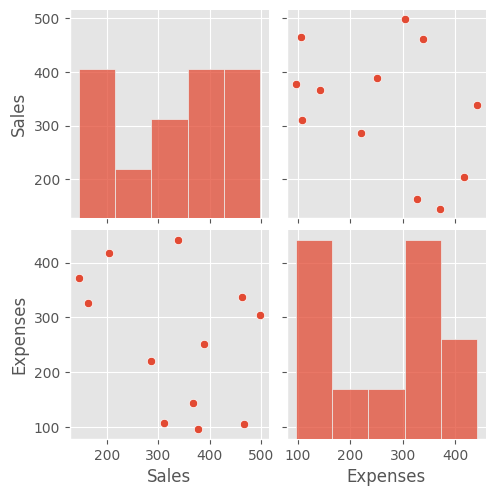

In [15]:
# Pair plot to visualize relationships between all numeric variables
# Reset index to include Month as a column
sns.pairplot(df.reset_index())

## ✅ Wrap-Up

- Use Pandas for quick EDA visualization.
- Switch to Seaborn/Matplotlib for better control.
- Customize charts with style and annotations.
- Explore patterns using rolling means, correlation, and pair plots.

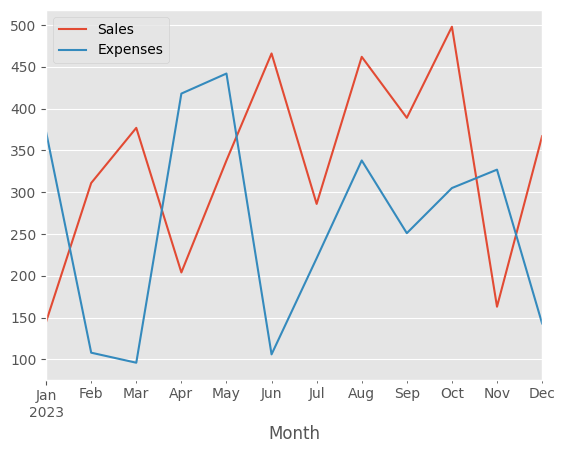

In [16]:
# Save the last figure generated from Pandas plotting
fig = df.plot().get_figure()
fig.savefig("output_chart.png")